# VCM Grab n Focus Ctrl

In [1]:
import numpy as np
import subprocess
import glob
import skimage.io as imio
import re
from skimage.color import rgb2gray
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## ip good for the period of quarantine
IP = '10.42.0.215'

In [3]:
## echo + sudo -S is to bypass the pw
## good for the purple module with 2 VCMs mounted

def initialFocus(sid=0, ip = IP):
    cmD='ssh nvidia@'+ip+' "echo "nvidia" | sudo -S ~/Documents/cam_on_Tegra/testCamera -id '+str(sid)+' -init "'
    pop=subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    return pop.stdout
def moveFocus(sid=0, pos=512, ip = IP):
    cmD='ssh nvidia@'+ip+' "echo "nvidia" | sudo -S ~/Documents/cam_on_Tegra/testCamera -id '+str(sid)+' -mod '+str(pos)+'"'
    pop=subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    return pop.stdout
def setFocus(sid=0, pos=512, ip = IP):
    cmD='ssh nvidia@'+ip+' "echo "nvidia" | sudo -S ~/Documents/cam_on_Tegra/testCamera -id '+str(sid)+' -set '+str(pos)+'"'
    pop=subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    return pop.stdout

def grab_image(sid=0, imres=8, ip = IP):

    subprocess.run('ssh nvidia@'+ip+' "rm testGrab*"', \
                   stdout=subprocess.PIPE, shell=True)
    subprocess.run('rm testGrab*', \
                    stdout=subprocess.PIPE, shell=True)

    subprocess.run('ssh nvidia@'+ip+' "nvgstcapture-1.0 -m 1 --sensor-id '+str(sid)+' -A --capture-auto 1 \
                    --file-name testGrab --image-res '+str(imres)+'"', stdout=subprocess.PIPE, shell=True)
    subprocess.run('scp nvidia@'+ip+':testGrab* .', \
                   stdout=subprocess.PIPE, shell=True)
    pop=subprocess.run('ls',stdout=subprocess.PIPE, shell=True)
    rePop=pop.stdout
    rePop=rePop.decode("utf-8")
    fileName = re.search(r'testGrab(.*).jpg', rePop)
    fileName=fileName.group()
    pop=imio.imread(fileName)
    pop=skimage.transform.rotate(pop,180)
    
    return pop

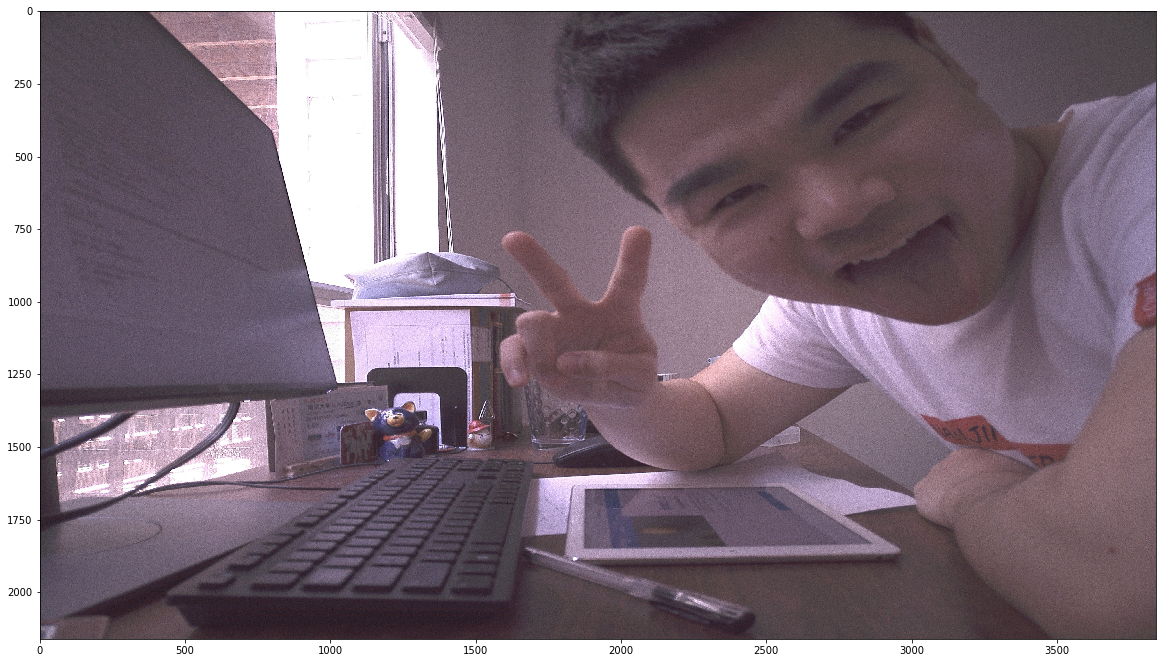

In [4]:
curr = 400
setFocus(pos = curr)

img = grab_image()
gray_img = rgb2gray(img)

plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.show()